# Modelo de mezclas Gaussianas
Ejemplo de implementación del modelo de mezclas Gausssianas (GMM) utilizando el conjunto de datos de un modelo de negocio de distribución

### Conjunto de Datos

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

datos = pd.read_csv('S7_KMEANS_RESELLER_Daily.csv')
datos.head()

,Country,ResellerID,Trans12Mo,Units12Mo
0,Argentina,4810912,1,1
1,Argentina,56864507,1,1
2,Argentina,54239933,1,1
3,Argentina,54310743,1,1
4,Argentina,56624338,1,1


Text(0,0.5,'# of Licenses bought')

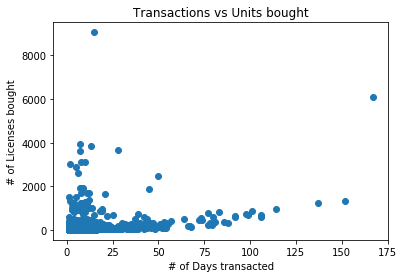

In [16]:
plt.scatter(datos['Trans12Mo'],datos['Units12Mo'])
plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')


### Creación del modelo GMM
Se utilizan las primeras dos características del conjunto de datos

In [28]:
# Crear modelo
X1 =np.array([datos['Trans12Mo'],datos['Units12Mo']])
X=np.transpose(X1)

from sklearn.mixture import GaussianMixture

modelo = GaussianMixture(n_components = 20, covariance_type = 'full') # Puede haber distintos tipos de covarianzas
modelo.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

### Inspección del modelo GMM

(0, 200)

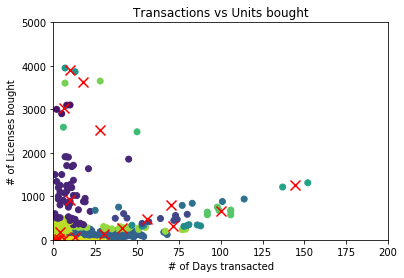

In [29]:
# Obtiene las etiquetas que especifican a qué grupo pertenecen los datos de X
y = modelo.predict(X)

# Obtiene las coordenadas de las medias
C = modelo.means_

# Grafica los datos agrupados
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

ax = plt.gca()
ax.set_ylim([0,5000])
ax.set_xlim([0,200])

### Función modificada de: 
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py

In [30]:
def plot_results(X, Y_, means, covariances):
    import itertools
    from scipy import linalg
    import numpy as np
    import matplotlib as mpl
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold','darkorange'])
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, s= 50)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

Text(0,0.5,'# of Licenses bought')

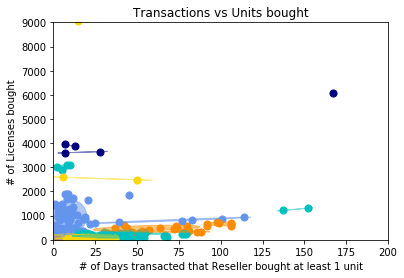

In [31]:
plot_results(X,modelo.predict(X), modelo.means_, modelo.covariances_)
ax = plt.gca()
ax.set_ylim([0,9000])
ax.set_xlim([0,200])

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted that Reseller bought at least 1 unit')
plt.ylabel('# of Licenses bought')


Text(0,0.5,'# of Licenses bought')

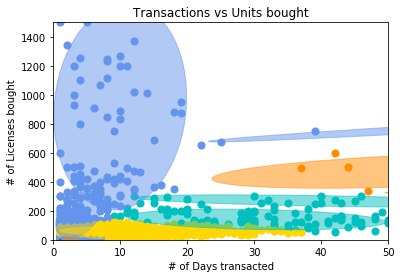

In [32]:
plot_results(X,modelo.predict(X), modelo.means_, modelo.covariances_)
ax = plt.gca()
ax.set_ylim([0,1500])
ax.set_xlim([0,50])

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

### Predicción de nuevos elementos

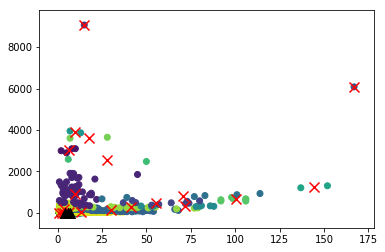

In [33]:
# Datos de prueba (originalmente no están en el conjunto de datos)
import numpy as np
Xp = np.array([[4,2],[6,4],[7,3.5]])

# Grafica los datos junto con los grupos obtenidos previamente
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],color = 'black', marker = '^', s = 100)

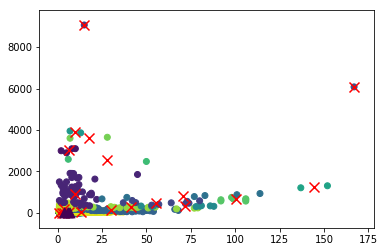

In [34]:
# Predice el grupo al que pertenecen
yp = modelo.predict(Xp)

# Grafica la predicción
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],c=yp, marker = '^', s = 100)

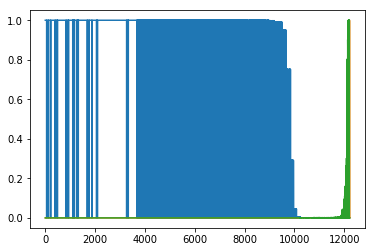

In [35]:
y_prob = modelo.predict_proba(X)

plt.plot(y_prob[:,0])
plt.plot(y_prob[:,1])
plt.plot(y_prob[:,2])

In [36]:
modelo.score(X)

-1.6662059502059545

In [37]:
results = np.transpose(np.array([X[:,0],X[:,1],y]))
ResultsF=np.transpose(np.array([datos['ResellerID'],results[:,0],results[:,1],results[:,2]]))
print(ResultsF)

[[ 4810912        1        1        0]
 [56864507        1        1        0]
 [54239933        1        1        0]
 ...
 [58367305        7     3950       10]
 [15999341      167     6079        5]
 [39542070       15     9063        3]]


In [38]:
y=np.savetxt("reportGMM.csv",ResultsF,  delimiter=",")

In [14]:
modelo.score_samples(X)

array([ 4.7766898 ,  4.7766898 ,  4.7766898 , ..., -7.89971124,
        2.5668861 ,  2.5668861 ])